<a href="https://www.kaggle.com/code/reebapatel/layoffs?scriptVersionId=287235055" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/layoffs-data-2022/layoffs_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/layoffs-data-2022/layoffs_data.csv')

In [3]:
print(df.shape)

(3642, 12)


In [4]:
print(df.columns)

Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Date',
       'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'Percentage', 'List_of_Employees_Laid_Off'],
      dtype='object')


In [5]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3642 non-null   object 
 1   Location_HQ                 3642 non-null   object 
 2   Industry                    3642 non-null   object 
 3   Laid_Off_Count              2389 non-null   float64
 4   Date                        3642 non-null   object 
 5   Source                      3642 non-null   object 
 6   Funds_Raised                3252 non-null   float64
 7   Stage                       3642 non-null   object 
 8   Date_Added                  3642 non-null   object 
 9   Country                     3642 non-null   object 
 10  Percentage                  2342 non-null   float64
 11  List_of_Employees_Laid_Off  3642 non-null   object 
dtypes: float64(3), object(9)
memory usage: 341.6+ KB


In [7]:
df.isnull().sum()

Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1253
Date                             0
Source                           0
Funds_Raised                   390
Stage                            0
Date_Added                       0
Country                          0
Percentage                    1300
List_of_Employees_Laid_Off       0
dtype: int64

In [8]:
df.describe()

,Laid_Off_Count,Funds_Raised,Percentage
count,2389.000000,3252.000000,2342.000000
mean,257.926329,798.569494,0.281216
std,829.432277,4758.393161,0.287294
min,3.000000,0.000000,0.000000
25%,40.000000,51.000000,0.100000
50%,80.000000,166.000000,0.170000
75%,181.000000,469.250000,0.300000
max,14000.000000,121900.000000,1.000000


### 📌 Interpretation of Summary Statistics (Dataset-Specific)

- **count**: Layoff counts and percentages are missing for some companies, indicating incomplete reporting and the need to handle missing values before modeling.
- **mean**: The average layoffs (~258) and average funds raised (~799M) are much higher than what most companies experience, showing that a few extreme cases heavily inflate the mean.
- **std**: The very large standard deviations compared to the means indicate extreme variability, meaning companies differ drastically in both funding levels and layoff sizes.
- **min**: Some companies laid off very few employees or raised no funding at all, representing early-stage, small-scale, or minimally impacted organizations.
- **25% (Q1)**: At least 25% of companies laid off fewer than ~40 employees and raised under ~51M, showing that small layoffs and modest funding are common.
- **50% (median)**: Half of the companies laid off 80 or fewer employees and raised under ~166M, making this a more realistic picture of a typical company than the mean.
- **75% (Q3)**: Only 25% of companies exceed ~181 layoffs and ~469M in funding, indicating that larger layoffs and high funding are relatively less frequent.
- **max**: A very small number of companies account for extreme events (up to 14,000 layoffs and 121.9B in funding), which strongly skew the distributions and must be treated as outliers.



Conclusion:
✅ Use median + IQR, not just mean
✅ Normalize or log-transform Funds_Raised
✅ Watch out for extreme outliers
✅ Regularization will be important
✅ Simple linear assumptions may fail
✅ Evaluation should use robust metrics

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df["Industry"].value_counts()



Industry
Finance           451
Retail            297
Healthcare        296
Transportation    226
Other             223
Food              213
Consumer          207
Marketing         178
Real Estate       151
Crypto            144
Education         142
Media             137
Security          121
Data              116
HR                 97
Travel             97
Infrastructure     66
Logistics          64
Sales              56
Support            54
Hardware           50
Recruiting         49
Product            48
Fitness            42
Energy             30
Construction       24
Manufacturing      18
Legal              18
Aerospace          16
AI                 10
Unknown             1
Name: count, dtype: int64

In [11]:
df["Stage"].value_counts()


Stage
Post-IPO          768
Unknown           618
Series B          429
Series C          405
Series D          316
Acquired          314
Series A          245
Series E          171
Seed              117
Series F          102
Private Equity     63
Series H           33
Series G           23
Subsidiary         21
Series J            9
Series I            8
Name: count, dtype: int64

In [12]:
df["Country"].value_counts()

Country
United States     2369
India              262
Canada             138
United Kingdom     126
Germany            103
                  ... 
Russia               1
Uruguay              1
Bulgaria             1
South Africa         1
Myanmar              1
Name: count, Length: 63, dtype: int64

In [13]:
df["Country"].value_counts().head(10)

Country
United States     2369
India              262
Canada             138
United Kingdom     126
Germany            103
Israel              87
Brazil              86
Australia           72
Singapore           49
Indonesia           38
Name: count, dtype: int64

In [14]:
cols_to_drop = [
    "Date_Added",
    "Source",
    "Percentage",
    "List_of_Employees_Laid_Off"
]

df = df.drop(columns=cols_to_drop)


In [15]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         3642 non-null   object 
 1   Location_HQ     3642 non-null   object 
 2   Industry        3642 non-null   object 
 3   Laid_Off_Count  2389 non-null   float64
 4   Date            3642 non-null   object 
 5   Funds_Raised    3252 non-null   float64
 6   Stage           3642 non-null   object 
 7   Country         3642 non-null   object 
dtypes: float64(2), object(6)
memory usage: 227.8+ KB


In [16]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [17]:
df["Date"].dtype


dtype('<M8[ns]')

In [18]:
df["Date"].min(), df["Date"].max()


(Timestamp('2020-03-11 00:00:00'), Timestamp('2024-06-05 00:00:00'))

In [19]:
df["Year"] = df["Date"].dt.year


In [20]:
df.head(20)

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Country,Year
0,Oda,Oslo,Food,150.0,2024-06-05,691.0,Unknown,Norway,2024
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,2000.0,Post-IPO,Israel,2024
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,119.0,Unknown,Israel,2024
3,MoonPay,Dover,Crypto,30.0,2024-06-05,651.0,Unknown,United States,2024
4,Yext,New York City,Marketing,NaN,2024-06-05,117.0,Post-IPO,United States,2024
5,Microsoft,Seattle,Other,1000.0,2024-06-03,1.0,Post-IPO,United States,2024
6,OrCam,Jerusalem,Healthcare,100.0,2024-06-03,86.0,Unknown,Israel,2024
7,Google,SF Bay Area,Consumer,100.0,2024-05-31,26.0,Post-IPO,United States,2024
8,Tropic,New York City,Finance,40.0,2024-05-31,67.0,Series B,United States,2024
9,Gro Intelligence,New York City,Food,NaN,2024-05-31,118.0,Series B,United States,2024


In [21]:
df_layoffs = df.dropna(subset=["Laid_Off_Count"])


df_layoffs

This is the dataframe where:

Laid_Off_Count is NOT NaN

So we’re working only with valid numeric layoff data.


In [22]:
layoffs_by_year = (
    df_layoffs
    .groupby("Year")["Laid_Off_Count"] 
    .sum()
    .reset_index()
)

.groupby() - Group all rows that belong to the same year together
.sum() - adds up all layoffs within each year
.reset_index() - Without this, Year would become the index (annoying to plot). This converts it back into a normal column so the dataframe looks normal

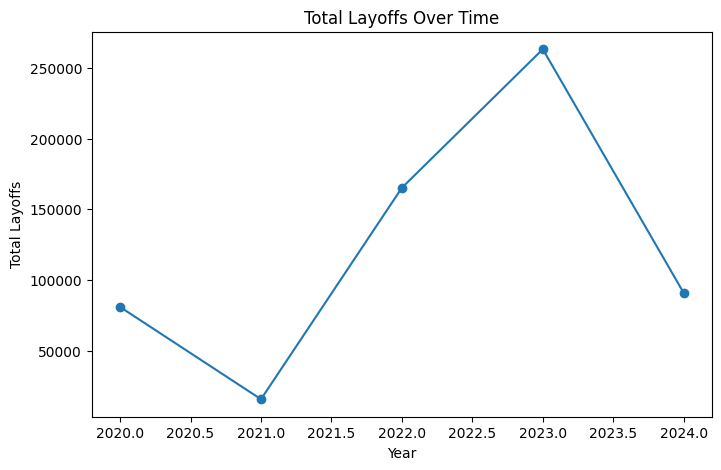

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))

plt.plot(layoffs_by_year["Year"], layoffs_by_year["Laid_Off_Count"], marker="o")
plt.title("Total Layoffs Over Time")
plt.xlabel("Year")
plt.ylabel("Total Layoffs")
plt.show()

Layoffs increased sharply after 2021, peaking during 2022–2023, reflecting post-pandemic corrections and economic uncertainty.

In [24]:
industry_layoffs = (
    df_layoffs
    .groupby("Industry")["Laid_Off_Count"]
    .sum()
    .sort_values(ascending = False)
    # .head(10)
)

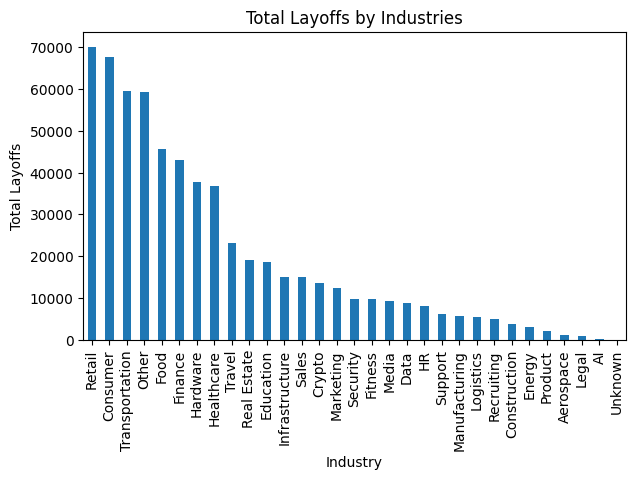

In [25]:
plt.figure(figsize = (7,4))
industry_layoffs.plot(kind="bar")
plt.title("Total Layoffs by Industries")
plt.xlabel("Industry")
plt.ylabel("Total Layoffs")
plt.show()

In [26]:
country_layoffs = (
    df_layoffs 
    .groupby("Country")["Laid_Off_Count"]
    .sum()
    .sort_values(ascending = False)
)

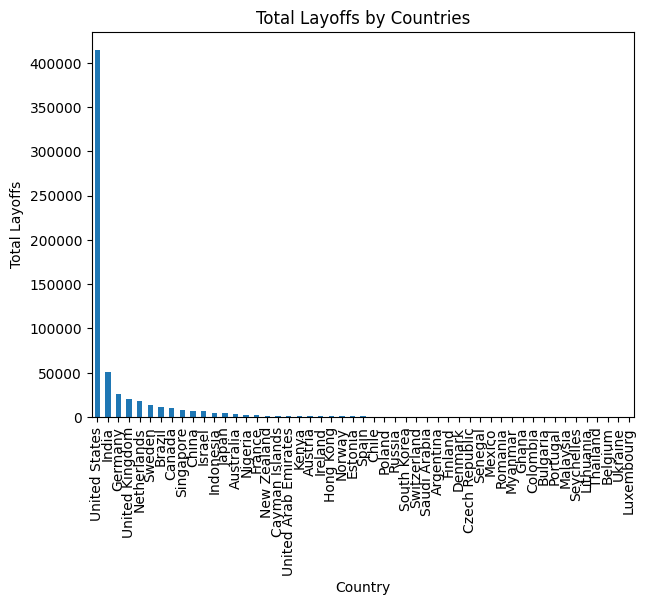

In [27]:
plt.figure(figsize = (7,5))
country_layoffs.plot(kind="bar")
plt.title("Total Layoffs by Countries")
plt.xlabel("Country")
plt.ylabel("Total Layoffs")
plt.show()

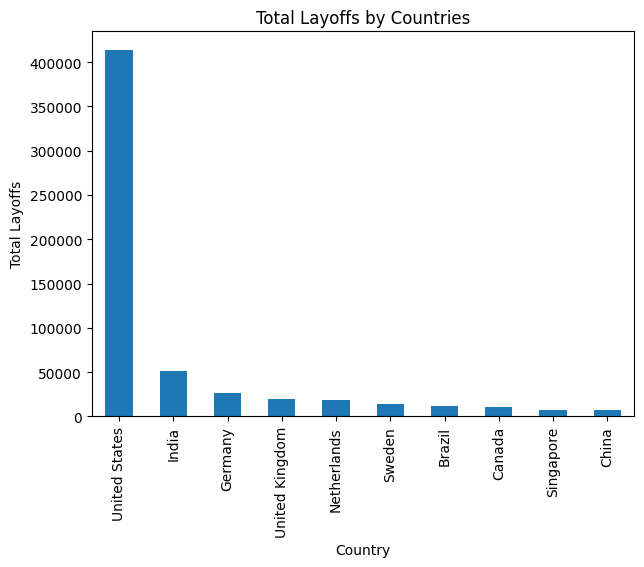

In [28]:
country_layoffs = (
    df_layoffs 
    .groupby("Country")["Laid_Off_Count"]
    .sum()
    .sort_values(ascending = False)
    .head(10)
)
plt.figure(figsize = (7,5))
country_layoffs.plot(kind="bar")
plt.title("Total Layoffs by Countries")
plt.xlabel("Country")
plt.ylabel("Total Layoffs")
plt.show()

The United States accounts for the highest number of layoffs, highlighting its concentration of large tech and startup firms.

In [29]:
stage_layoffs = (
    df_layoffs
    .groupby("Stage")["Laid_Off_Count"]
    .sum()
    .sort_values( ascending = False)
)

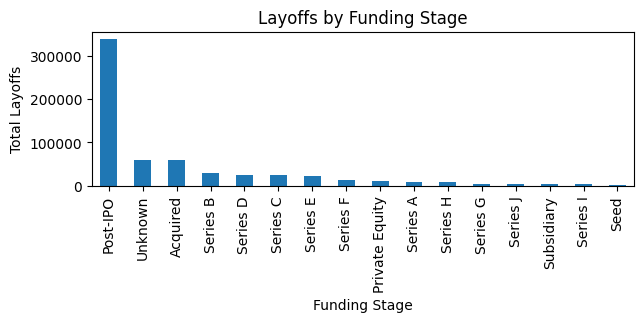

In [30]:
plt.figure( figsize = (7,2))
stage_layoffs.plot(kind = "bar")
plt.title("Layoffs by Funding Stage")
plt.xlabel("Funding Stage")
plt.ylabel("Total Layoffs")
plt.show()

Post-IPO companies account for the largest absolute layoffs.

Later-stage companies tend to conduct larger layoffs per event.

Typical company lifecycle looks like this:

Seed – idea stage

Series A / B / C / … – growth funded by VCs

IPO – company goes public

Post-IPO – public company phase

So Post-IPO is not a startup anymore in the strict sense. It’s a mature company.

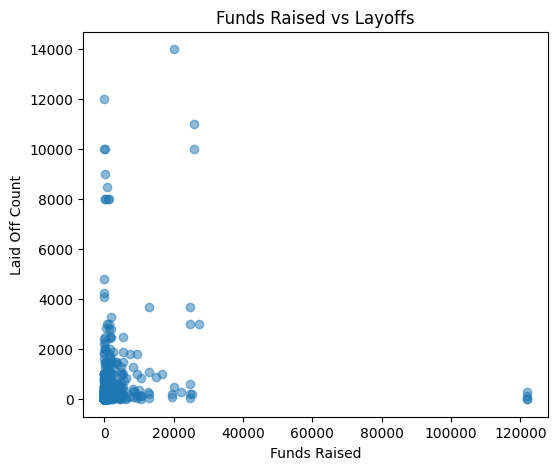

In [31]:
df_funding = df_layoffs.dropna(subset = ["Funds_Raised"])

plt.figure(figsize = (6,5))
plt.scatter(df_funding["Funds_Raised"] , df_funding["Laid_Off_Count"], alpha = 0.5)
plt.xlabel("Funds Raised")
plt.ylabel("Laid Off Count")
plt.title("Funds Raised vs Layoffs")
plt.show()

Higher fundraising does not guarantee workforce stability, as several highly funded companies still conducted somewhat layoffs.

📌 Key Insights

The United States dominates total layoffs, highlighting geographic concentration of tech and startup activity.

Retail and consumer-facing industries faced the most workforce reductions.

Layoffs surged during the COVID and post-COVID period, reflecting economic disruption and hiring corrections.

Post-IPO companies account for the largest layoffs, showing that maturity does not guarantee workforce stability.

High funding or public status does not prevent large-scale layoffs.